In [1]:
'''
This is an example of sklearn being used for Machine Learning. The objective is to predict if 
a person is having a heart attack.
Data collected by Prof. Nirton Cristi and not publicly available.
'''
import pandas as pd
import numpy as np
from sklearn.covariance import empirical_covariance
import matplotlib.pyplot as plt
# import scikitplot as skplt
import csv
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import graphviz
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import GaussianNB




##########################################
# Correlacao entre as variaveis de entrada e saida, mudando a concentracao



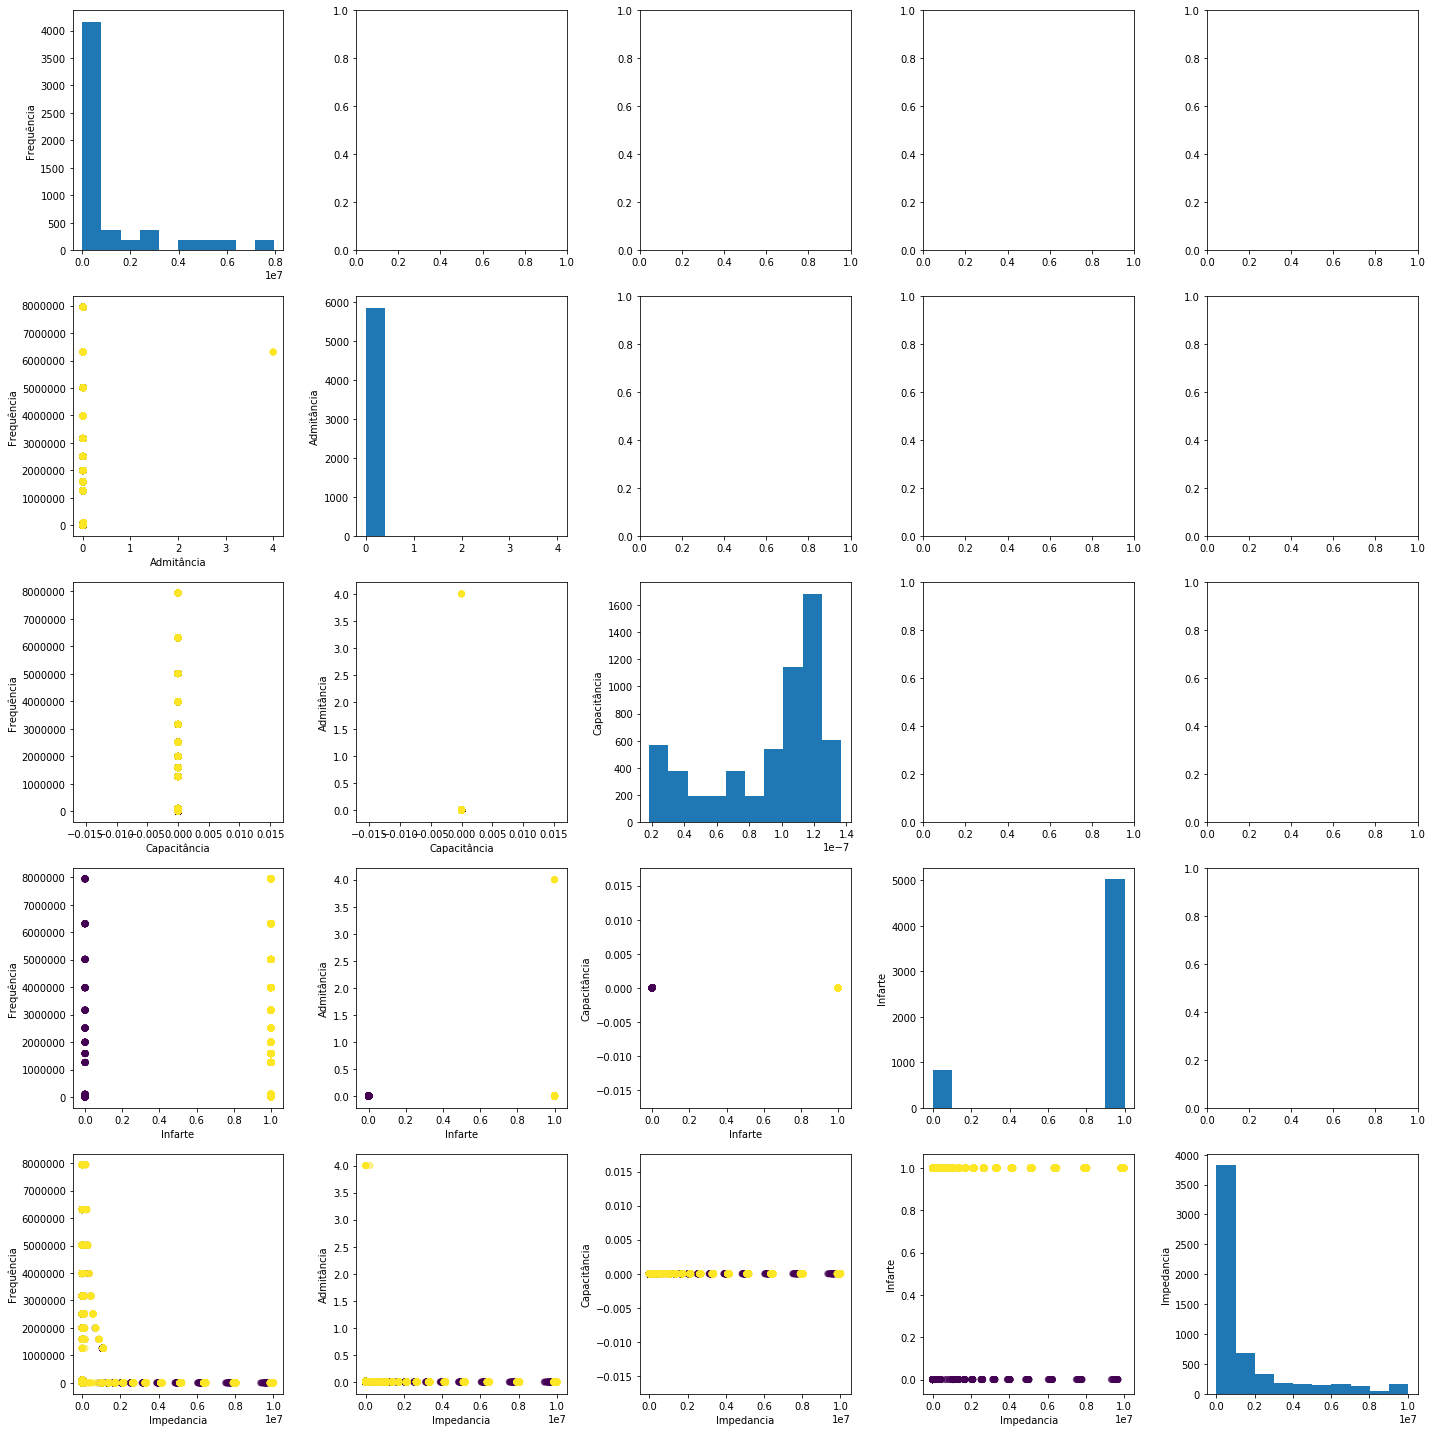

In [3]:
num_colunas = len(dados.columns)
fig, axes = plt.subplots(num_colunas, num_colunas, figsize=(20,20))
for indexi, colunai in enumerate(dados):
    for indexj, colunaj in enumerate(dados):
        if indexi > indexj:
            axes[indexi, indexj].scatter(dados[colunai], dados[colunaj], c=dados["Infarte"], alpha=0.5)
            axes[indexi, indexj].set_xlabel(colunai)
            axes[indexi, indexj].set_ylabel(colunaj)
        elif indexi == indexj:
            axes[indexi, indexj].hist(dados[colunai])
            axes[indexi, indexj].set_ylabel(colunai)
            
plt.tight_layout()
plt.show()


In [4]:
# KNN
np.random.seed(9876)
X = dados.drop(columns=["Infarte"])
y = dados["Infarte"]

# Normalizar os dados
X = normalize(X)

df = pd.DataFrame(columns=["T_F_Media", "T_F_Var","T_P_Media", "T_P_Var", 
                           "Neighs", "Alg", "Act_Means", "Act_Var"])
for neighs in range(1, 5):
    for alg in ['auto', 'kd_tree', 'brute', 'ball_tree']:
        knn = KNeighborsClassifier(n_neighbors=neighs, algorithm=alg)
        info = cross_validate(knn, X, y, cv = 30)
        score = info["test_score"]
        t_fit = info["fit_time"]
        t_score = info["score_time"]
        df = df.append({"T_F_Media": np.array(t_fit).mean(), "T_F_Var":np.array(t_fit).var(),
                        "T_P_Media":np.array(t_score).mean(), "T_P_Var":np.array(t_score).var(), "Neighs": neighs, 
                        "Alg": alg, "Act_Means": np.array(score).mean(), "Act_Var": np.array(score).var()}, ignore_index=True)
df.to_csv("knn.csv")
df.to_latex("knn.tex")
df

,T_F_Media,T_F_Var,T_P_Media,T_P_Var,Neighs,Alg,Act_Means,Act_Var
0,0.005216,2.980229e-07,0.001313,1.699441e-08,1,auto,0.964522,0.000178
1,0.005136,3.275091e-07,0.001272,1.917005e-08,1,kd_tree,0.964522,0.000178
2,0.001234,8.137926e-08,0.032579,3.379221e-05,1,brute,0.954787,0.000228
3,0.004718,3.276325e-08,0.001220,1.387318e-08,1,ball_tree,0.964522,0.000178
4,0.005051,4.607623e-08,0.001357,1.398850e-09,2,auto,0.953605,0.000330
5,0.005412,9.033119e-07,0.001443,5.374816e-08,2,kd_tree,0.953605,0.000330
6,0.001110,1.753697e-08,0.034635,1.361973e-05,2,brute,0.946430,0.000297
7,0.004768,4.321601e-08,0.001255,3.956057e-09,2,ball_tree,0.953605,0.000330
8,0.005274,1.586813e-07,0.001490,5.106057e-08,3,auto,0.970480,0.000114
9,0.005449,3.426377e-07,0.001587,1.103860e-07,3,kd_tree,0.970480,0.000114


In [5]:
# Naive Bayes
np.random.seed(5)
X = dados.drop(columns=["Infarte"])
y = dados["Infarte"]

df = pd.DataFrame(columns=["T_F_Media", "T_F_Var","T_P_Media", "T_P_Var", 
                           "Act_Means", "Act_Var"])

nbt = GaussianNB(priors=None)
info = cross_validate(nbt, X, y, cv = 30)
score = info["test_score"]
t_fit = info["fit_time"]
t_score = info["score_time"]
df = df.append({"T_F_Media": np.array(t_fit).mean(), "T_F_Var":np.array(t_fit).var(),
                "T_P_Media":np.array(t_score).mean(), "T_P_Var":np.array(t_score).var(), 
                "Act_Means": np.array(score).mean(), "Act_Var": np.array(score).var()}, ignore_index=True)
df.to_csv("naive.csv")
df.to_latex("naive.tex")
df

# data = tree.export_graphviz(dtf, out_file=None) 
# graph = graphviz.Source(data) 
# graph.render("TD") 


,T_F_Media,T_F_Var,T_P_Media,T_P_Var,Act_Means,Act_Var
0,0.002697,9.036706e-08,0.000543,1.015761e-08,0.857145,0.000002


In [6]:
# MLP
np.random.seed(9876)
y = dados["Infarte"]
X = dados.drop(columns=["Infarte"])

# Normalizar os dados
X = normalize(X)
df = pd.DataFrame(columns=["T_F_Media", "T_F_Var","T_P_Media", "T_P_Var", "Activation",
                           "Solver","Learning_Rate", "Act_Means", "Act_Var"])
for learn in ['constant', 'invscaling', 'adaptive']:
    for act in ['identity', 'logistic', 'tanh', 'relu']:
        for solv in ['lbfgs', 'sgd', 'adam']:
            for alp in np.arange(0.0001, 0.001):
                mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation=act, solver=solv, alpha=alp, batch_size='auto', 
                                learning_rate=learn, learning_rate_init=0.001, power_t=0.5, max_iter=500, shuffle=True, 
                                random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
                                beta_2=0.999, epsilon=1e-08)
                info = cross_validate(mlp, X, y, cv = 30)
                score = info["test_score"]
                t_fit = info["fit_time"]
                t_score = info["score_time"]
                df = df.append({"T_F_Media": np.array(t_fit).mean(), "T_F_Var":np.array(t_fit).var(),
                                "T_P_Media":np.array(t_score).mean(), "T_P_Var":np.array(t_score).var(),
                                "Activation":act, "Solver":solv, "Learning_Rate":learn, "Act_Means": np.array(score).mean(), 
                                "Act_Var": np.array(score).var()}, ignore_index=True)
df.to_csv("mlp.csv")
df.to_latex("mlp.tex")
df


,T_F_Media,T_F_Var,T_P_Media,T_P_Var,Activation,Solver,Learning_Rate,Act_Means,Act_Var
0,0.155156,0.010363,0.000954,5.577512e-07,identity,lbfgs,constant,0.857145,0.000002
1,0.409438,0.014512,0.000805,6.921868e-08,identity,sgd,constant,0.857145,0.000002
2,0.222491,0.005326,0.000882,1.141352e-07,identity,adam,constant,0.857145,0.000002
3,0.362095,0.017771,0.001909,2.846064e-07,logistic,lbfgs,constant,0.857145,0.000002
4,0.339400,0.007183,0.001909,2.744875e-06,logistic,sgd,constant,0.857145,0.000002
5,0.303574,0.002786,0.001442,1.642626e-09,logistic,adam,constant,0.857145,0.000002
6,0.344821,0.012966,0.001488,6.448304e-09,tanh,lbfgs,constant,0.857145,0.000002
7,0.767634,0.030974,0.001747,1.904969e-06,tanh,sgd,constant,0.857145,0.000002
8,0.375191,0.005423,0.001785,2.661790e-06,tanh,adam,constant,0.857145,0.000002
9,0.226656,0.011359,0.000796,1.826638e-08,relu,lbfgs,constant,0.857145,0.000002


In [7]:
# SVM
np.random.seed(9876)
X = pd.DataFrame(normalize(dados.drop(columns=["Infarte"])))
y = dados["Infarte"]

# Normalizar os dados
# X = normalize(X)

df = pd.DataFrame(columns=["T_F_Media", "T_F_Var","T_P_Media", "T_P_Var", 
                           "Kernel", "DSF", "Act_Means", "Act_Var"])
for ker in ['linear', 'poly', 'rbf', 'sigmoid']:
    for dsf in ['ovo', 'ovr']:
        svm = SVC(C=1.0, kernel=ker, degree=3, gamma="auto", coef0=0.0, shrinking=True, probability=False, tol=0.001, 
                  cache_size=200, class_weight=None, verbose=False, max_iter=10000, decision_function_shape=dsf, 
                  random_state=None)
        info = cross_validate(svm, X, y, cv = 30)
        score = info["test_score"]
        t_fit = info["fit_time"]
        t_score = info["score_time"]
        df = df.append({"T_F_Media": np.array(t_fit).mean(), "T_F_Var":np.array(t_fit).var(),
                        "T_P_Media":np.array(t_score).mean(), "T_P_Var":np.array(t_score).var(), 
                        "Kernel":ker, "DSF": dsf, "Act_Means": np.array(score).mean(), 
                        "Act_Var": np.array(score).var()}, ignore_index=True)
df.to_csv("svm.csv")
df.to_latex("svm.tex")
df

,T_F_Media,T_F_Var,T_P_Media,T_P_Var,Kernel,DSF,Act_Means,Act_Var
0,0.189991,0.000013,0.003892,3.307051e-09,linear,ovo,0.857145,0.000002
1,0.194145,0.000259,0.003972,1.609788e-07,linear,ovr,0.857145,0.000002
2,0.221428,0.000007,0.004932,2.489420e-07,poly,ovo,0.857145,0.000002
3,0.223348,0.000005,0.004872,6.630854e-09,poly,ovr,0.857145,0.000002
4,1.642584,0.001894,0.011956,2.949818e-08,rbf,ovo,0.857145,0.000002
5,1.635873,0.000604,0.012249,2.018939e-06,rbf,ovr,0.857145,0.000002
6,1.213326,0.001711,0.013740,1.581457e-07,sigmoid,ovo,0.857145,0.000002
7,1.195407,0.000118,0.013501,3.667133e-09,sigmoid,ovr,0.857145,0.000002


In [8]:
# Passive Agrassive

np.random.seed(9876)
X = dados.drop(columns=["Infarte"])
y = dados["Infarte"]

df = pd.DataFrame(columns=["T_F_Media", "T_F_Var","T_P_Media", "T_P_Var", "C",
                           "Act_Means", "Act_Var"])
for c in np.arange(1.0, 10.0):
    for h in ["hinge", "squared_hinge"]:
        pac = PassiveAggressiveClassifier(C=c, fit_intercept=True, max_iter=10000, tol=1e-4, shuffle=True, verbose=0, 
                                              loss=h, n_jobs=1, random_state=None, warm_start=False, class_weight=None, 
                                              average=False, n_iter=None)
        info = cross_validate(pac, X, y, cv = 30)
        score = info["test_score"]
        t_fit = info["fit_time"]
        t_score = info["score_time"]
        df = df.append({"T_F_Media": np.array(t_fit).mean(), "T_F_Var":np.array(t_fit).var(),
                        "T_P_Media":np.array(t_score).mean(), "T_P_Var":np.array(t_score).var(), "C":c,
                            "Act_Means": np.array(score).mean(), "Act_Var": np.array(score).var()}, ignore_index=True)
df.to_csv("pass_agr.csv")
df.to_latex("pass_agr.tex")
df


,T_F_Media,T_F_Var,T_P_Media,T_P_Var,C,Act_Means,Act_Var
0,0.004188,4.418699e-07,0.000564,2.502037e-08,1.0,0.781474,0.021173
1,0.004016,2.262146e-07,0.000501,2.207028e-10,1.0,0.773534,0.030690
2,0.003970,1.420330e-07,0.000495,1.562677e-10,2.0,0.769287,0.039863
3,0.003954,1.791128e-07,0.000490,1.209754e-10,2.0,0.785051,0.018915
4,0.004073,3.419840e-07,0.000488,2.697258e-11,3.0,0.689469,0.061081
5,0.004295,2.978909e-07,0.000533,4.775785e-09,3.0,0.776419,0.032388
6,0.004006,1.731307e-07,0.000491,4.891035e-11,4.0,0.712569,0.050850
7,0.003950,2.179110e-07,0.000495,1.168916e-10,4.0,0.747531,0.028598
8,0.003982,2.355781e-07,0.000492,9.433709e-11,5.0,0.768074,0.038262
9,0.004044,3.404843e-07,0.000494,1.288360e-10,5.0,0.747081,0.032294
